[2025/02/08 01:22:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

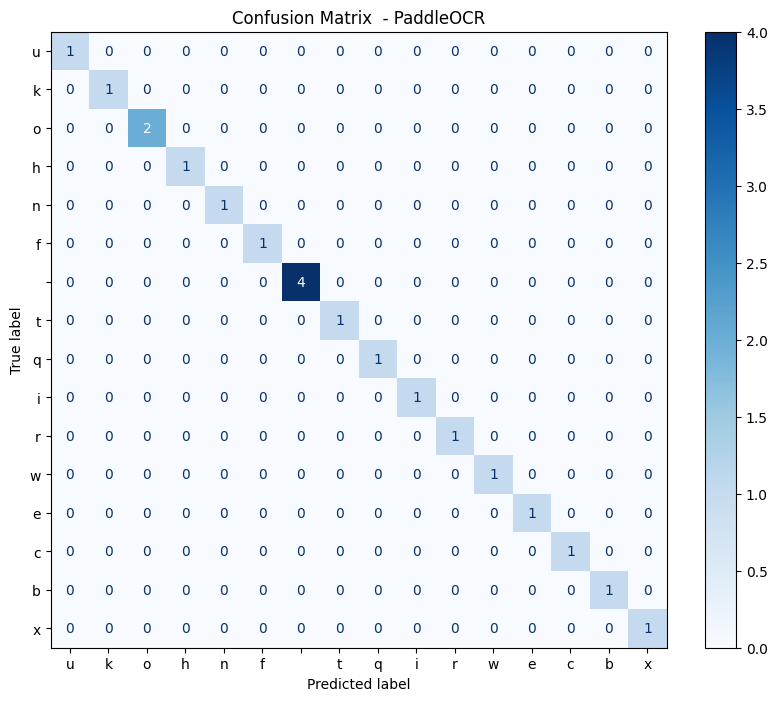

In [ ]:
import cv2
from paddleocr import PaddleOCR
import easyocr
import pytesseract
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from jiwer import cer, wer
from Levenshtein import distance as levenshtein_distance
import matplotlib.pyplot as plt
import numpy as np

# Initialize OCR models
paddle_ocr = PaddleOCR(use_angle_cls=True, lang='en')
easyocr_reader = easyocr.Reader(['en'])
# Update this path for Tesseract

# Define the image path and ground truth text
image_path = '/content/image1.jpg'  # Replace with your image path
ground_truth = "The quick brown fox "  # Replace with your ground truth text

# Perform OCR using PaddleOCR
paddle_result = paddle_ocr.ocr(image_path)
paddle_text = " ".join([line[1][0] for line in paddle_result[0]])

# Perform OCR using EasyOCR
image = cv2.imread(image_path)
easyocr_result = easyocr_reader.readtext(image)
easyocr_text = " ".join([line[1] for line in easyocr_result])



# Function to calculate metrics
def calculate_metrics(ground_truth, ocr_text):
    cer_score = cer(ground_truth.lower(), ocr_text.lower())
    wer_score = wer(ground_truth.lower(), ocr_text.lower())
    lev_distance = levenshtein_distance(ground_truth.lower(), ocr_text.lower())
    accuracy = (1 - cer_score) * 100
    return cer_score, wer_score, lev_distance, accuracy

# Calculate metrics for each OCR tool
paddle_metrics = calculate_metrics(ground_truth, paddle_text)
easyocr_metrics = calculate_metrics(ground_truth, easyocr_text)


# Print metrics for comparison
print("📊 OCR Model Comparison:")
print(f"PaddleOCR: CER={paddle_metrics[0]:.4f}, WER={paddle_metrics[1]:.4f}, Levenshtein Distance={paddle_metrics[2]}, Accuracy={paddle_metrics[3]:.2f}%")
print(f"EasyOCR: CER={easyocr_metrics[0]:.4f}, WER={easyocr_metrics[1]:.4f}, Levenshtein Distance={easyocr_metrics[2]}, Accuracy={easyocr_metrics[3]:.2f}%")

# Function to create confusion matrix
def create_confusion_matrix(ground_truth, ocr_text):
    gt_chars = list(ground_truth.lower())
    ocr_chars = list(ocr_text.lower())

    max_length = max(len(gt_chars), len(ocr_chars))
    gt_chars += [" "] * (max_length - len(gt_chars))
    ocr_chars += [" "] * (max_length - len(ocr_chars))

    cm = confusion_matrix(gt_chars, ocr_chars, labels=list(set(gt_chars + ocr_chars)))
    return cm, list(set(gt_chars + ocr_chars))

# Generate and display confusion matrix for PaddleOCR as an example
paddle_cm, labels = create_confusion_matrix(ground_truth, paddle_text)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=paddle_cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix  - PaddleOCR")
plt.show()
